# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('../data/North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

Notes  State  State Code Month Day, Year Month Day, Year Code  \
0        NaN  Texas        48.0    Jan 01, 1979           1979/01/01   
1        NaN  Texas        48.0    Jan 02, 1979           1979/01/02   
2        NaN  Texas        48.0    Jan 03, 1979           1979/01/03   
3        NaN  Texas        48.0    Jan 04, 1979           1979/01/04   
4        NaN  Texas        48.0    Jan 05, 1979           1979/01/05   
...      ...    ...         ...             ...                  ...   
12050    NaN  Texas        48.0    Dec 29, 2011           2011/12/29   
12051    NaN  Texas        48.0    Dec 30, 2011           2011/12/30   
12052    NaN  Texas        48.0    Dec 31, 2011           2011/12/31   
12053  Total  Texas        48.0             NaN                  NaN   
12054  Total    NaN         NaN             NaN                  NaN   

       Avg Daily Max Air Temperature (F)  
0                                  29.03  
1                                  31.35  
2                                  41.66  
3                                  47.30  
4                                  46.89  
...                                  ...  
12050                              66.64  
12051                              68.61  
12052                              73.49  
12053                              78.14  
12054                              78.14  

[12055 rows x 6 columns]

### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
# df=df.drop(df[df["Notes"]=="Total"].index)
# notes = df["Notes"]
# df=df.drop(df[df["Notes"]])
# df

#df.fillna()
df["Notes"]

cond = df["Notes"] == "Total"

df = df.drop(df[cond].index)

df =df.drop("Notes", axis = 1)

df


State  State Code Month Day, Year Month Day, Year Code  \
0      Texas        48.0    Jan 01, 1979           1979/01/01   
1      Texas        48.0    Jan 02, 1979           1979/01/02   
2      Texas        48.0    Jan 03, 1979           1979/01/03   
3      Texas        48.0    Jan 04, 1979           1979/01/04   
4      Texas        48.0    Jan 05, 1979           1979/01/05   
...      ...         ...             ...                  ...   
12048  Texas        48.0    Dec 27, 2011           2011/12/27   
12049  Texas        48.0    Dec 28, 2011           2011/12/28   
12050  Texas        48.0    Dec 29, 2011           2011/12/29   
12051  Texas        48.0    Dec 30, 2011           2011/12/30   
12052  Texas        48.0    Dec 31, 2011           2011/12/31   

       Avg Daily Max Air Temperature (F)  
0                                  29.03  
1                                  31.35  
2                                  41.66  
3                                  47.30  
4                                  46.89  
...                                  ...  
12048                              56.67  
12049                              59.91  
12050                              66.64  
12051                              68.61  
12052                              73.49  

[12053 rows x 5 columns]

>3) Make a column called Date that is in the pandas datetime format

In [5]:
d = df["Month Day, Year Code"]
df["Date"] = pd.to_datetime(d)
df


State  State Code Month Day, Year Month Day, Year Code  \
0      Texas        48.0    Jan 01, 1979           1979/01/01   
1      Texas        48.0    Jan 02, 1979           1979/01/02   
2      Texas        48.0    Jan 03, 1979           1979/01/03   
3      Texas        48.0    Jan 04, 1979           1979/01/04   
4      Texas        48.0    Jan 05, 1979           1979/01/05   
...      ...         ...             ...                  ...   
12048  Texas        48.0    Dec 27, 2011           2011/12/27   
12049  Texas        48.0    Dec 28, 2011           2011/12/28   
12050  Texas        48.0    Dec 29, 2011           2011/12/29   
12051  Texas        48.0    Dec 30, 2011           2011/12/30   
12052  Texas        48.0    Dec 31, 2011           2011/12/31   

       Avg Daily Max Air Temperature (F)       Date  
0                                  29.03 1979-01-01  
1                                  31.35 1979-01-02  
2                                  41.66 1979-01-03  
3                                  47.30 1979-01-04  
4                                  46.89 1979-01-05  
...                                  ...        ...  
12048                              56.67 2011-12-27  
12049                              59.91 2011-12-28  
12050                              66.64 2011-12-29  
12051                              68.61 2011-12-30  
12052                              73.49 2011-12-31  

[12053 rows x 6 columns]

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [6]:
df[["Year","Month","Day"]] = df["Date"].astype(str).str.split('-',expand = True)
df

State  State Code Month Day, Year Month Day, Year Code  \
0      Texas        48.0    Jan 01, 1979           1979/01/01   
1      Texas        48.0    Jan 02, 1979           1979/01/02   
2      Texas        48.0    Jan 03, 1979           1979/01/03   
3      Texas        48.0    Jan 04, 1979           1979/01/04   
4      Texas        48.0    Jan 05, 1979           1979/01/05   
...      ...         ...             ...                  ...   
12048  Texas        48.0    Dec 27, 2011           2011/12/27   
12049  Texas        48.0    Dec 28, 2011           2011/12/28   
12050  Texas        48.0    Dec 29, 2011           2011/12/29   
12051  Texas        48.0    Dec 30, 2011           2011/12/30   
12052  Texas        48.0    Dec 31, 2011           2011/12/31   

       Avg Daily Max Air Temperature (F)       Date  Year Month Day  
0                                  29.03 1979-01-01  1979    01  01  
1                                  31.35 1979-01-02  1979    01  02  
2                                  41.66 1979-01-03  1979    01  03  
3                                  47.30 1979-01-04  1979    01  04  
4                                  46.89 1979-01-05  1979    01  05  
...                                  ...        ...   ...   ...  ..  
12048                              56.67 2011-12-27  2011    12  27  
12049                              59.91 2011-12-28  2011    12  28  
12050                              66.64 2011-12-29  2011    12  29  
12051                              68.61 2011-12-30  2011    12  30  
12052                              73.49 2011-12-31  2011    12  31  

[12053 rows x 9 columns]

In [7]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

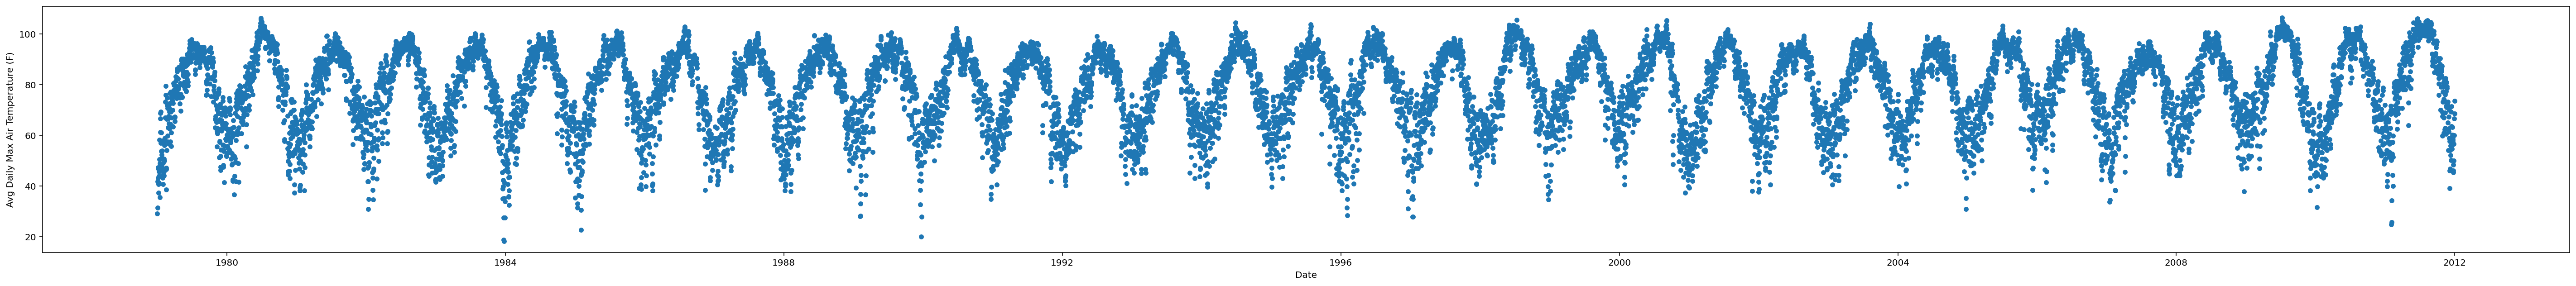

In [8]:
df.plot.scatter('Date','Avg Daily Max Air Temperature (F)',figsize=(50,5))

>5) Describe your plot.

In [10]:
print("A yearly cycle where temperature raises and dips to a point")

A yearly cycle where temperature raises and dips to a point


### Adding colors for our graph

In [11]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

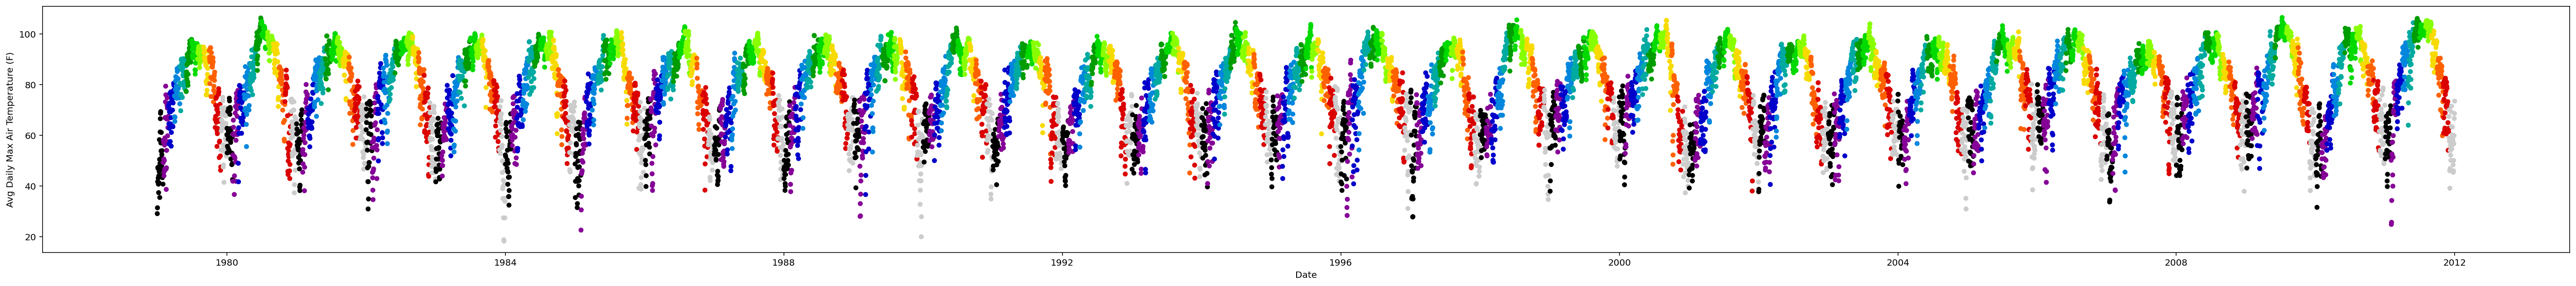

In [12]:
df.plot.scatter('Date','Avg Daily Max Air Temperature (F)',figsize=(50,5),c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [13]:
start = pd.to_datetime("2000-01-01")
end = pd.to_datetime("2000-07-01")
#a= df['Date'] > start;
#a = a['Date'] < end;
#a



#m = (df["Year"],df["Month"],df["Day"])
#m = df["Date"]
#pd.datetime(m)
#a = df[(m>start) & (m<end)]
#start(df["Date"][m])
m1 = (df["Date"] >= "2000-01-01") & (df["Date"] < "2000-06-01")
subset = df[m1]

#df["Date"][msk]


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

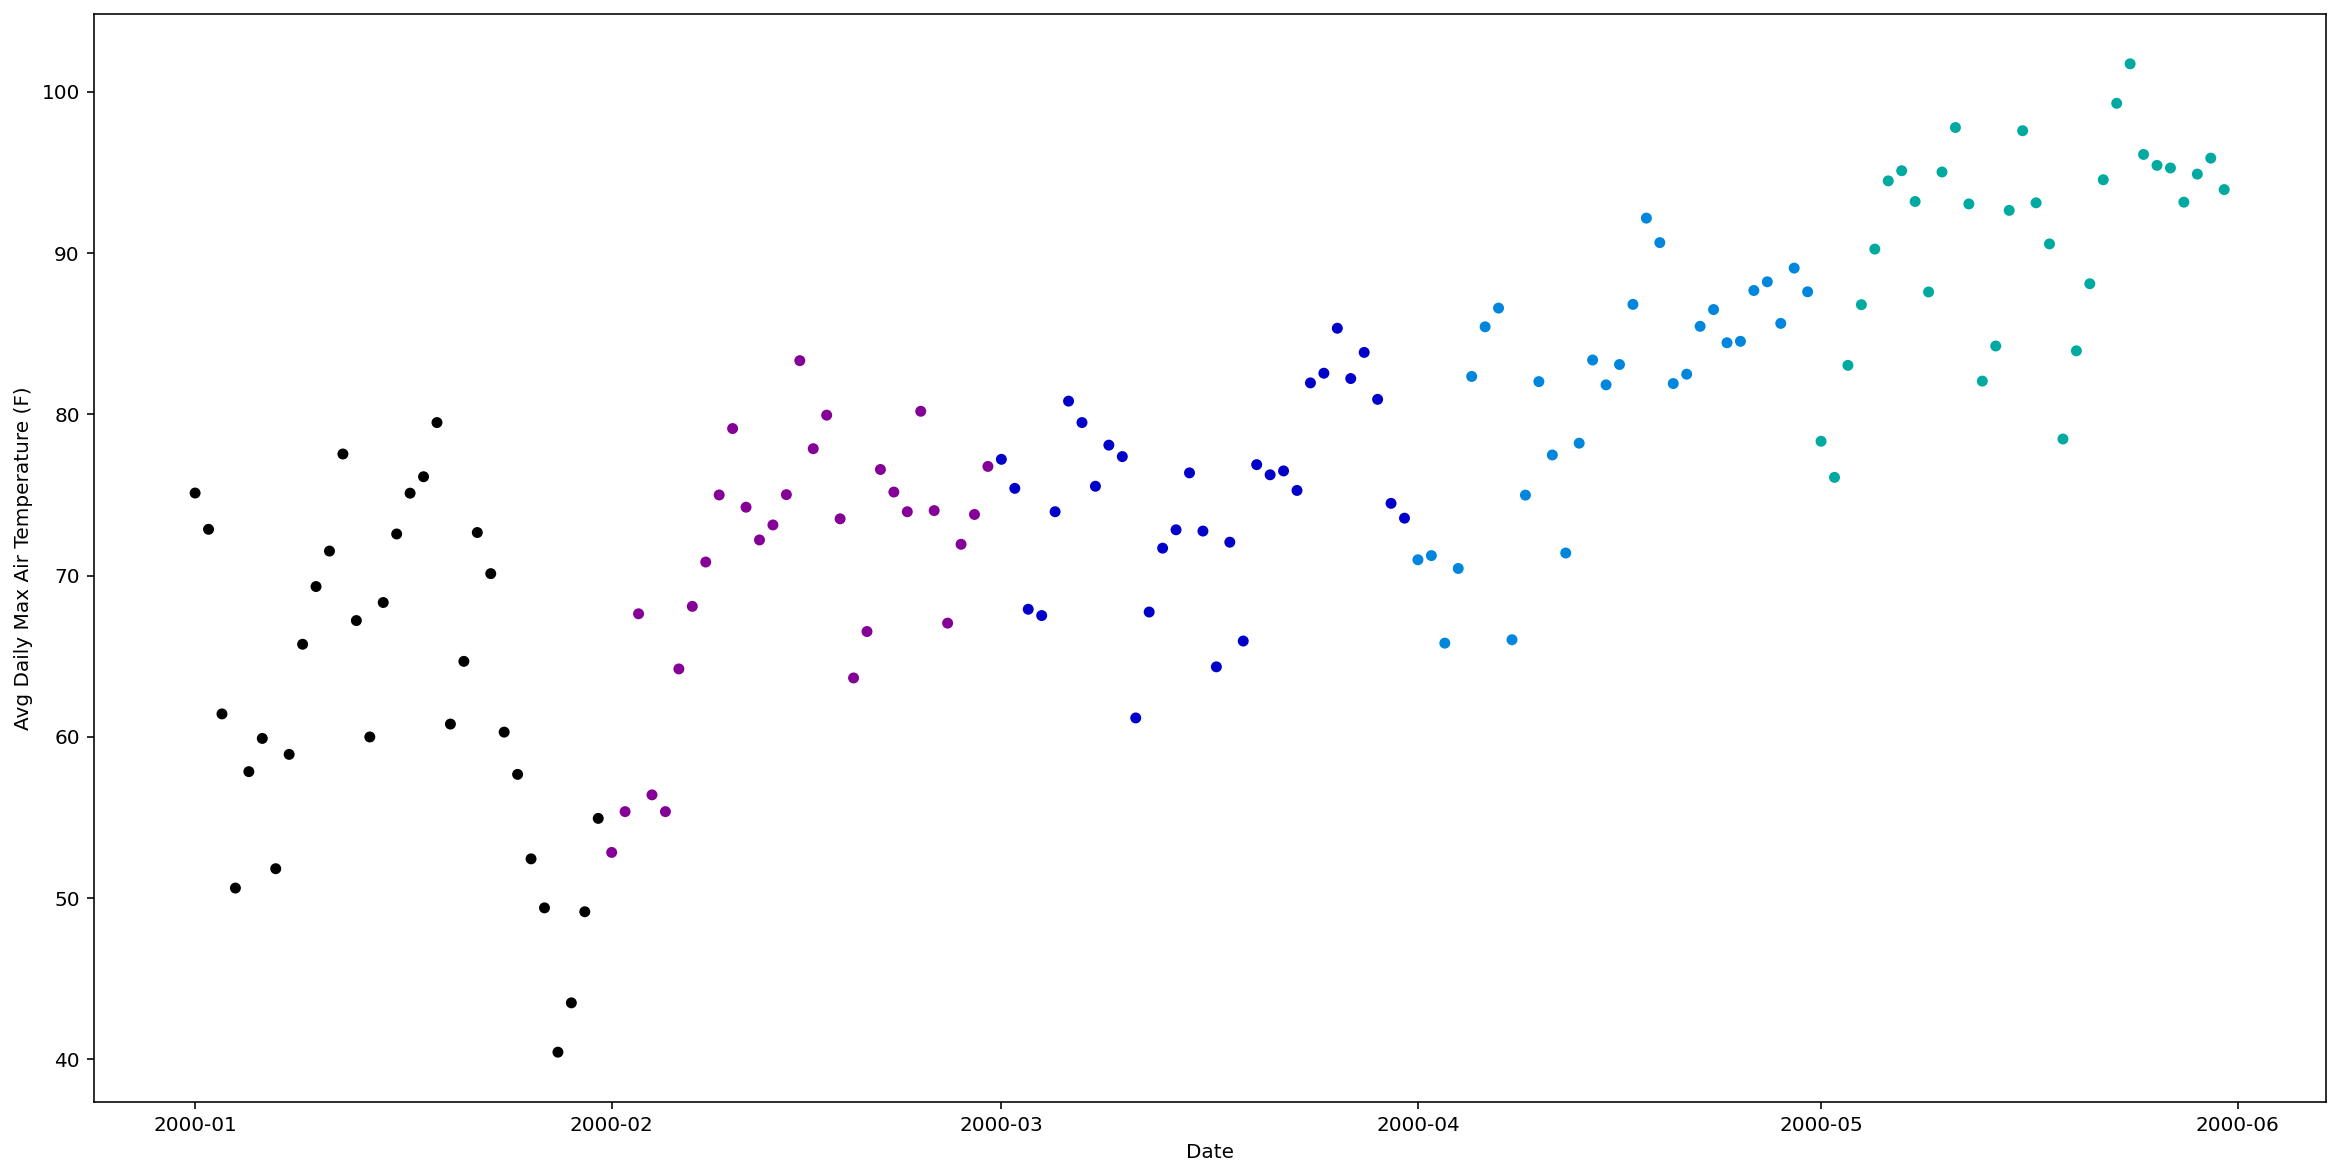

In [15]:
subset.plot.scatter('Date','Avg Daily Max Air Temperature (F)',figsize=(20,10),c=subset['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [16]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [17]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    print(m)
    # Calculate intercept
    b = y_avg - m*x_avg
    print(b)

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [18]:
Y_pred = lin_reg(X,Y)

0.0002578498181801154
-2381.558252773051
0.0002578498181801154 -2381.558252773051


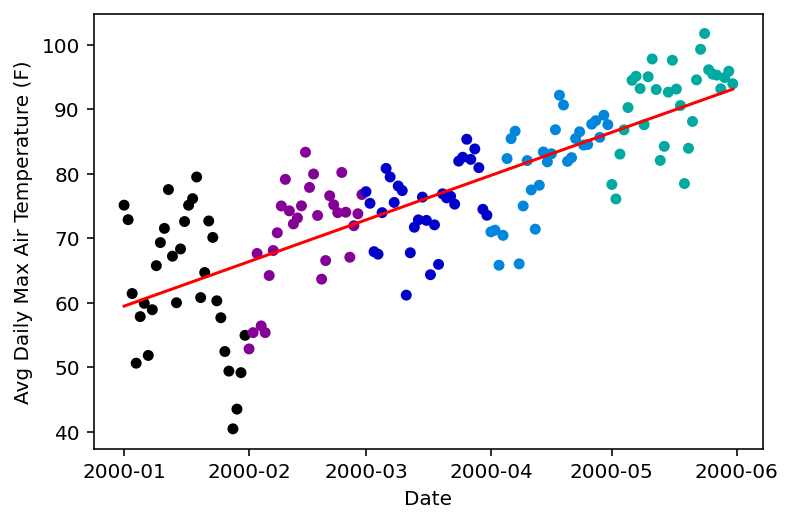

In [19]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [20]:
print("this is the slope 0.0002578498181801154. This is the y intercept -2381.558252773051")


this is the slope 0.0002578498181801154. This is the y intercept -2381.558252773051


>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [21]:
print (min(Y_pred),max(Y_pred))

59.46678276573766 93.10690144478849


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [22]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values
Y_pred = lin_reg(X,Y)


3.072410840971274e-07
75.67019246681011
3.072410840971274e-07 75.67019246681011


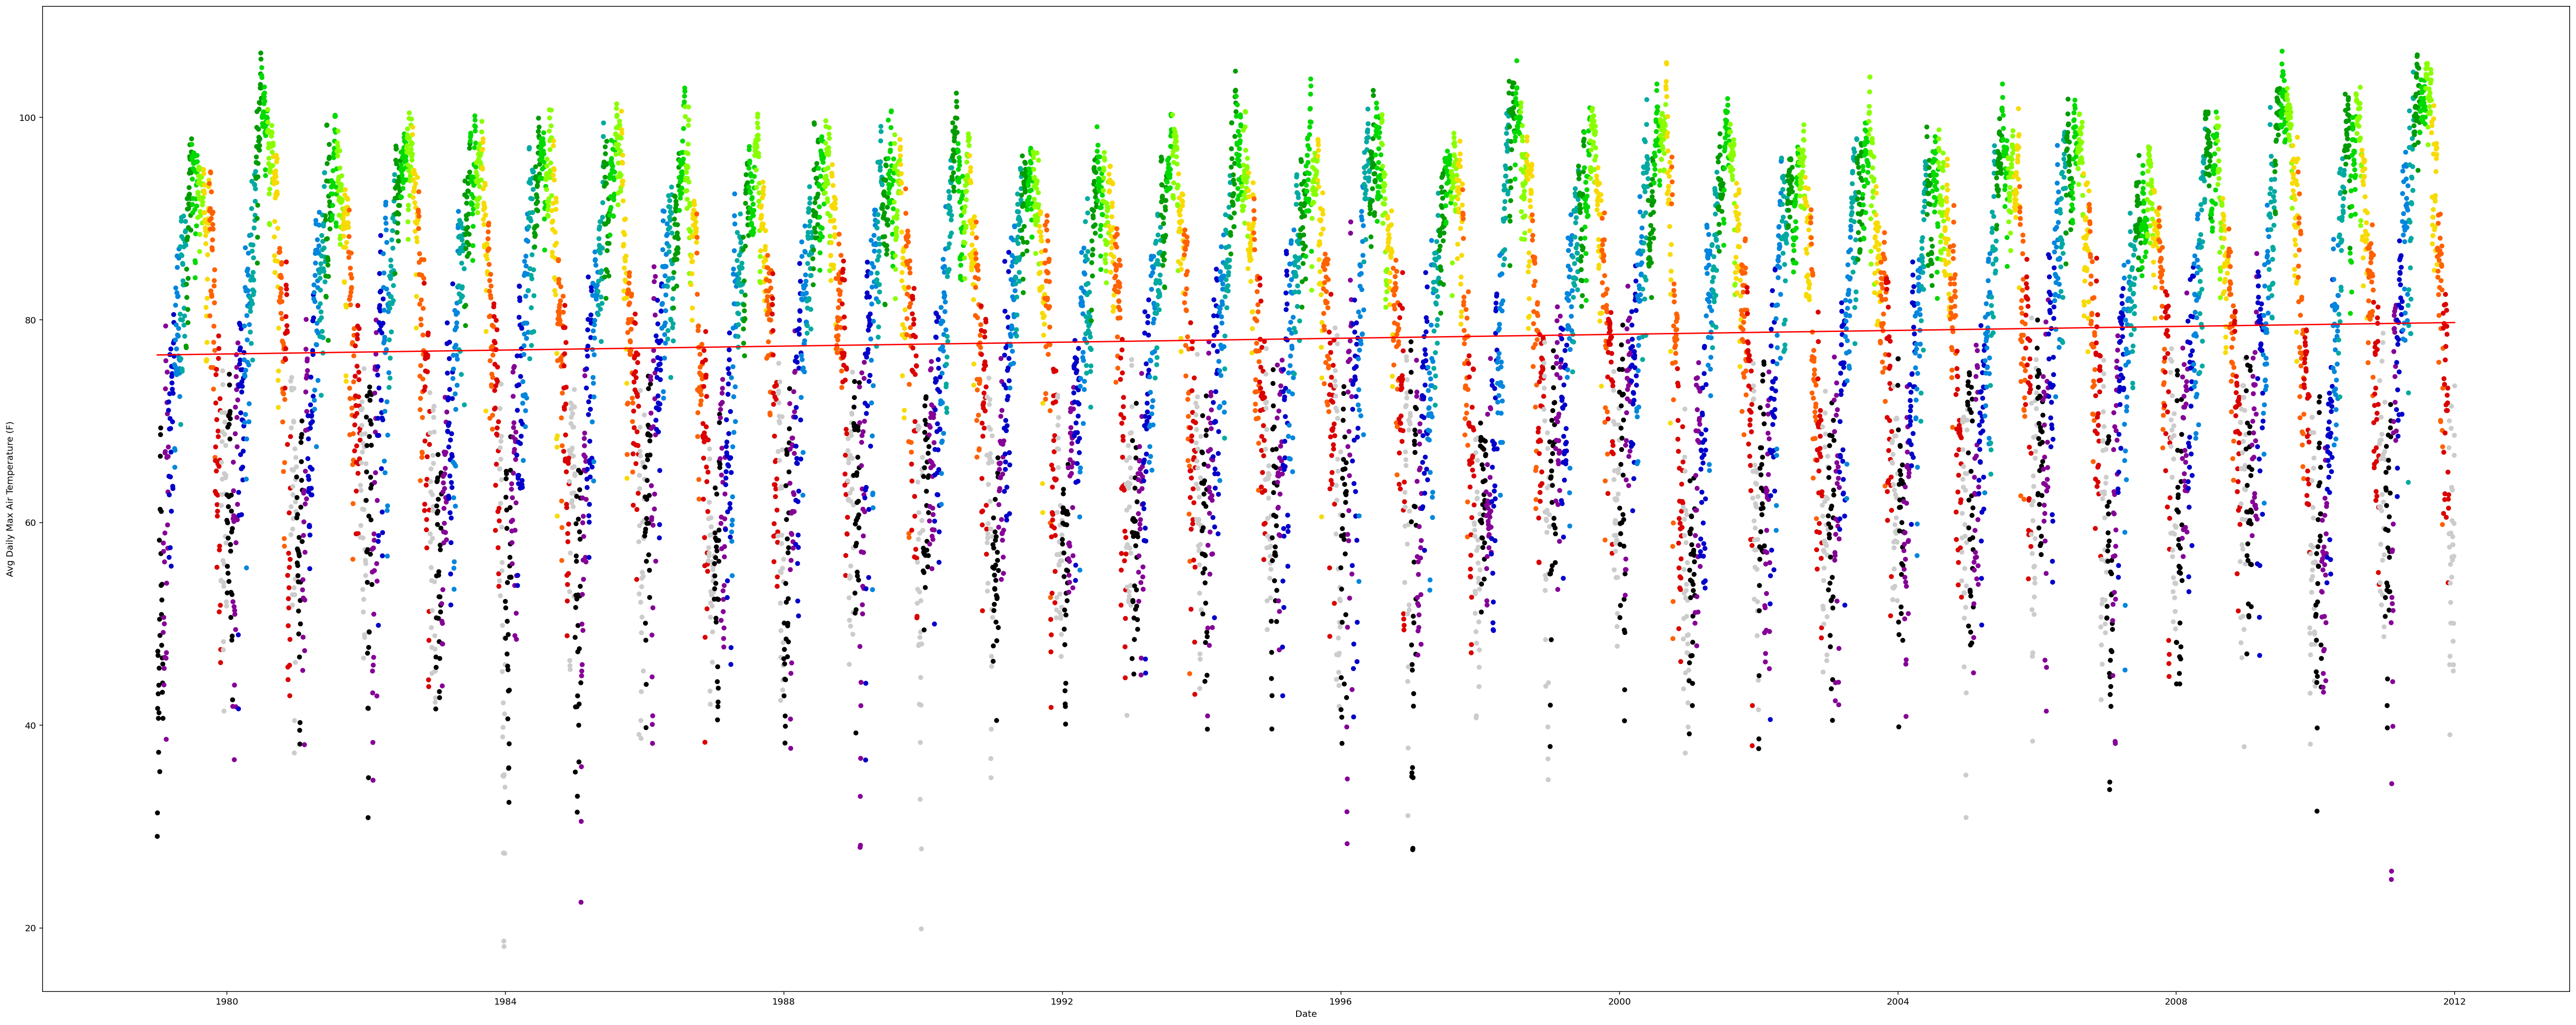

In [25]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,20),c=df['color'])
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)],color='red')
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [26]:
print("The slope is very slightly positive, however it is positive, showing that global warming is really heating this place up (last summer was sweltering)")

The slope is very slightly positive, however it is positive, showing that global warming is really heating this place up (last summer was sweltering)
